# Importing

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data Reading

In [4]:
df = pd.read_csv('train.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
person_age,37,22,29,30,22,27,25,21,37,35
person_income,35000,56000,28800,70000,60000,45000,45000,20000,69600,110000
person_home_ownership,RENT,OWN,OWN,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE
person_emp_length,0.0,6.0,8.0,14.0,2.0,2.0,9.0,0.0,11.0,0.0
loan_intent,EDUCATION,MEDICAL,PERSONAL,VENTURE,MEDICAL,VENTURE,EDUCATION,PERSONAL,EDUCATION,DEBTCONSOLIDATION
loan_grade,B,C,A,B,A,A,A,C,D,C
loan_amnt,6000,4000,6000,12000,6000,9000,12000,2500,5000,15000
loan_int_rate,11.49,13.35,8.9,11.11,6.92,8.94,6.54,13.49,14.84,12.98
loan_percent_income,0.17,0.07,0.21,0.17,0.1,0.2,0.27,0.13,0.07,0.14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

# Data Wrangling 

In [7]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

# EDA

In [10]:
df['person_age'].describe()


count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

In [11]:
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['person_age'] < (Q1 - 1.5 * IQR)) | (df['person_age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])
print(outliers['person_age'].describe())

Number of outliers: 2446
count    2446.000000
mean       46.402698
std         6.167012
min        41.000000
25%        42.000000
50%        44.000000
75%        49.000000
max       123.000000
Name: person_age, dtype: float64


In [12]:
df['person_age'] = df['person_age'].apply(lambda x: min(x, 100))

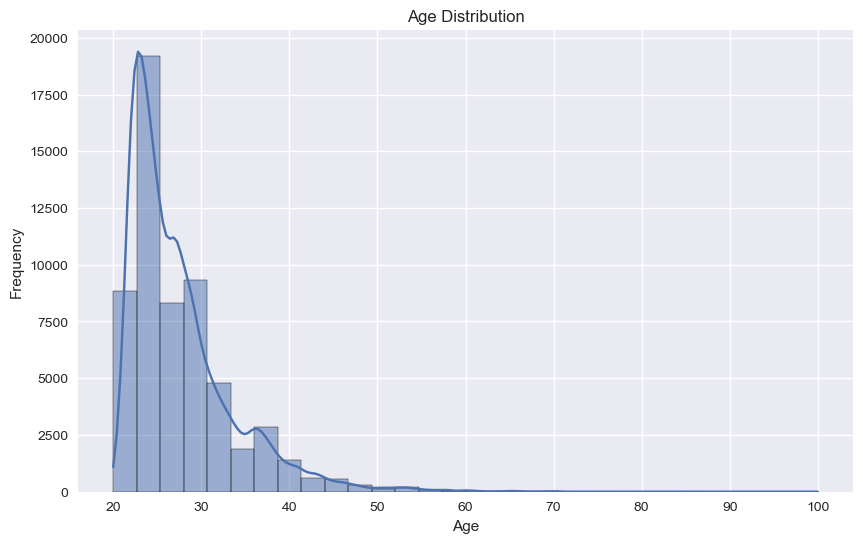

In [13]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')
sns.histplot(df['person_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
pd.set_option('display.float_format', '{:.0f}'.format)
df['person_income'].describe()

count     58645
mean      64046
std       37931
min        4200
25%       42000
50%       58000
75%       75600
max     1900000
Name: person_income, dtype: float64

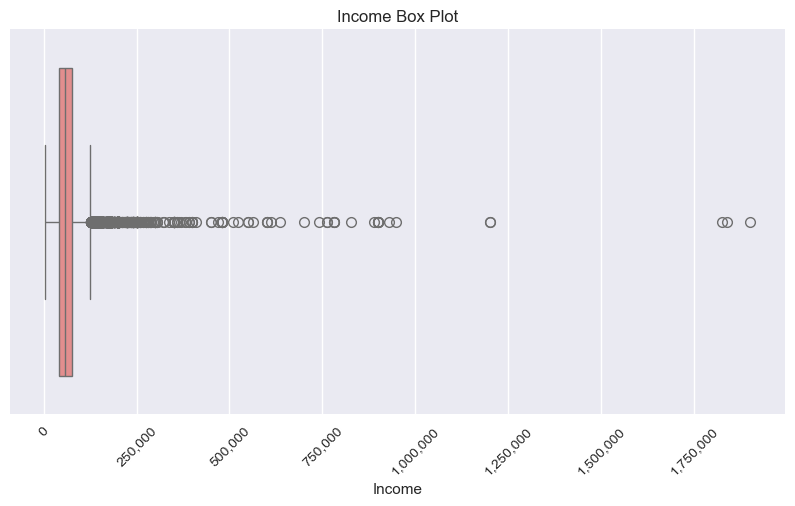

In [15]:
pd.set_option('display.float_format', '{:,.2f}'.format)
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['person_income'], color='lightcoral')
plt.title('Income Box Plot')
plt.xlabel('Income')

plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

C:\Users\manis\AppData\Local\Temp\ipykernel_23240\3908037816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ownership_counts.index, y=ownership_counts.values, palette='coolwarm')


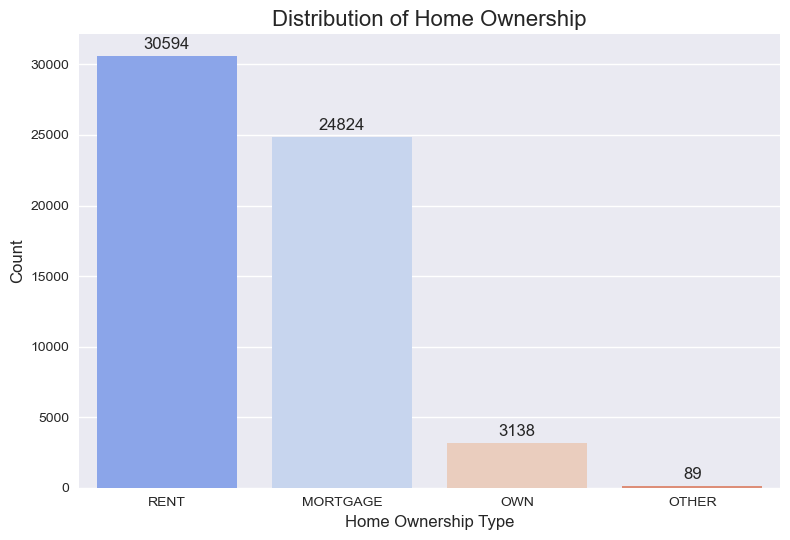

In [16]:
plt.style.use('seaborn-v0_8')
ownership_counts = df['person_home_ownership'].value_counts()
sns.barplot(x=ownership_counts.index, y=ownership_counts.values, palette='coolwarm')
plt.title('Distribution of Home Ownership', fontsize=16)
plt.xlabel('Home Ownership Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
# add numbers above
for i, count in enumerate(ownership_counts.values):
    plt.text(i, count + 500, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
df['person_emp_length'].describe()

count   58,645.00
mean         4.70
std          3.96
min          0.00
25%          2.00
50%          4.00
75%          7.00
max        123.00
Name: person_emp_length, dtype: float64

- logical max number 40 to 50 years of employment 

In [19]:
df = df[df['person_emp_length']<=45]


C:\Users\manis\AppData\Local\Temp\ipykernel_23240\525208667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_intent_counts.index, y=loan_intent_counts.values, palette='viridis')


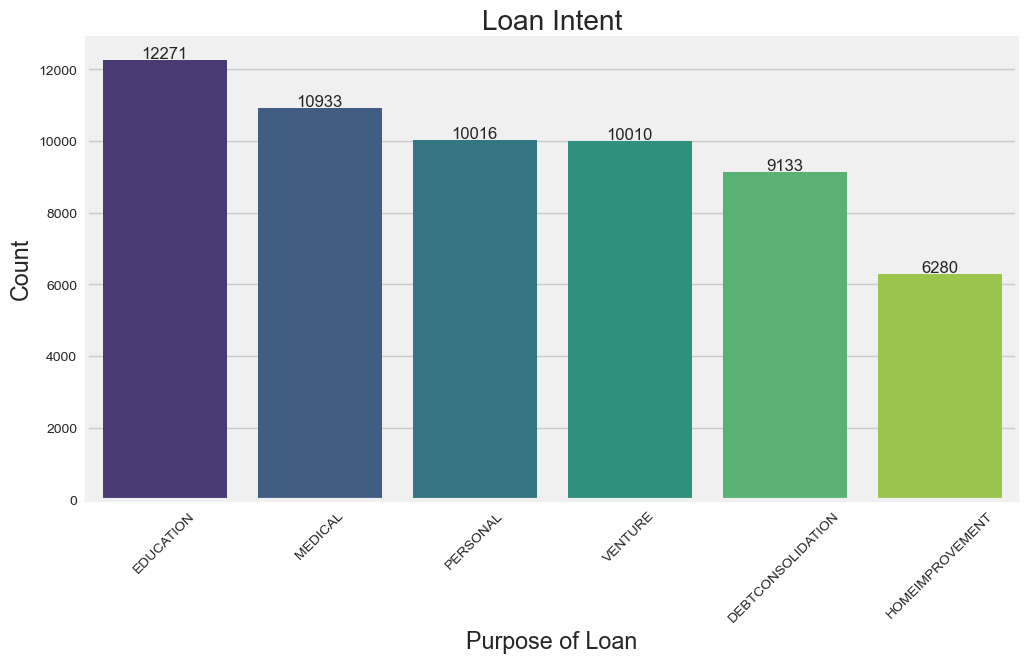

In [20]:
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
loan_intent_counts = df['loan_intent'].value_counts()
sns.barplot(x=loan_intent_counts.index, y=loan_intent_counts.values, palette='viridis')
plt.title('Loan Intent')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
for i, count in enumerate(loan_intent_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

In [21]:
df['loan_grade'].value_counts()

loan_grade
A    20984
B    20399
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64

- Grade A: The most frequent loan grade, with 20,984 loans. This suggests that a large portion of borrowers are considered to have high creditworthiness, resulting in lower-risk loans.

- Grade B: Close to Grade A in frequency, with 20,399 loans. Borrowers here may still be considered low-risk but with slightly higher risk than those in Grade A.

- Grade C: There are 11,036 loans assigned to this grade, which indicates a moderate level of risk.

- Grades D to G: The number of loans progressively decreases with higher risk, from Grade D (5,033 loans) to Grade G (only 33 loans). This reflects a smaller number of higher-risk loans, which may come with higher interest rates to compensate for the increased risk of default.

C:\Users\manis\AppData\Local\Temp\ipykernel_23240\3022171357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['loan_grade'].value_counts().index,


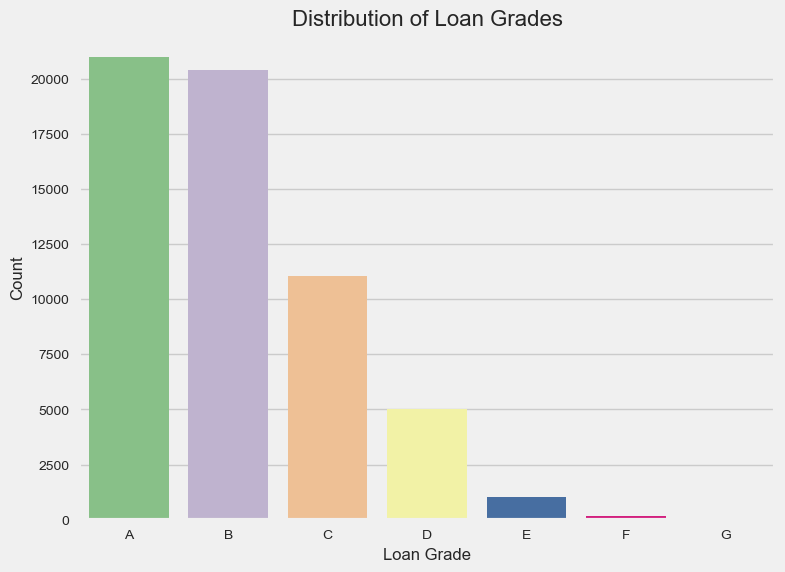

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['loan_grade'].value_counts().index, 
            y=df['loan_grade'].value_counts().values, 
            palette='Accent')
plt.title('Distribution of Loan Grades', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()  

In [24]:
df['loan_amnt'].describe()

count   58,643.00
mean     9,217.10
std      5,563.34
min        500.00
25%      5,000.00
50%      8,000.00
75%     12,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

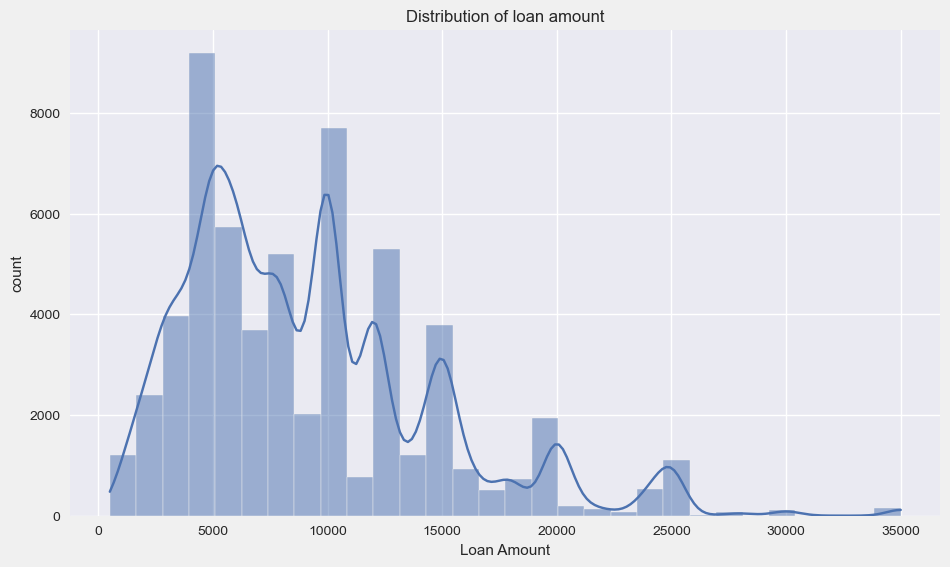

In [25]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of loan amount')
plt.xlabel('Loan Amount')
plt.ylabel('count')
plt.show()

In [26]:
df['loan_int_rate'].describe()

count   58,643.00
mean        10.68
std          3.03
min          5.42
25%          7.88
50%         10.75
75%         12.99
max         23.22
Name: loan_int_rate, dtype: float64

In [27]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49942
Y     8701
Name: count, dtype: int64

C:\Users\manis\AppData\Local\Temp\ipykernel_23240\656432351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')


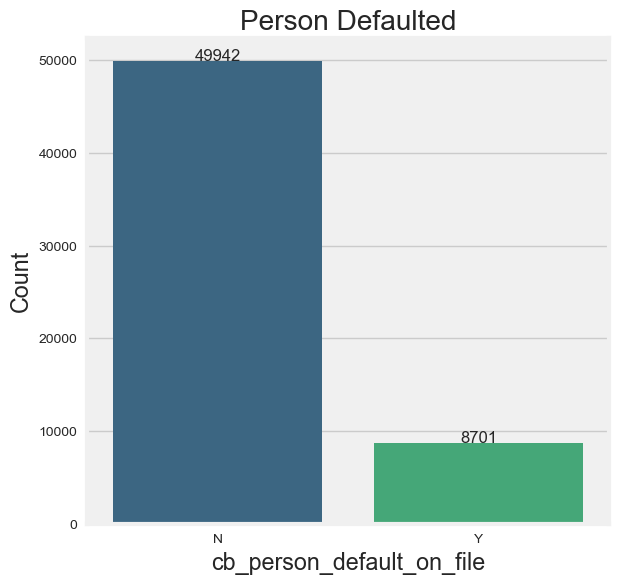

In [28]:
plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
default_counts = df['cb_person_default_on_file'].value_counts()
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')
plt.title('Person Defaulted')
plt.ylabel('Count')
for i, count in enumerate(default_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)
plt.show()

### Length of the credit history (in years).

In [30]:
df['cb_person_cred_hist_length'].describe()

count   58,643.00
mean         5.81
std          4.03
min          2.00
25%          3.00
50%          4.00
75%          8.00
max         30.00
Name: cb_person_cred_hist_length, dtype: float64

# Data Preprocessing

## Encoding

In [33]:
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])


In [34]:
df.head().T

,0,1,2,3,4
id,0.00,1.00,2.00,3.00,4.00
person_age,37.00,22.00,29.00,30.00,22.00
person_income,"35,000.00","56,000.00","28,800.00","70,000.00","60,000.00"
person_home_ownership,3.00,2.00,2.00,3.00,3.00
person_emp_length,0.00,6.00,8.00,14.00,2.00
loan_intent,1.00,3.00,4.00,5.00,3.00
loan_grade,1.00,2.00,0.00,1.00,0.00
loan_amnt,"6,000.00","4,000.00","6,000.00","12,000.00","6,000.00"
loan_int_rate,11.49,13.35,8.90,11.11,6.92
loan_percent_income,0.17,0.07,0.21,0.17,0.10


## Define Features and Target

In [36]:
X = df.drop(columns=['id','loan_status'])
Y = df['loan_status']

## Spliting

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=51)

# Machine Learning Algorithms 

In [40]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


results = []


for name, model in models.items():
    model.fit(X_train, Y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    accuracy = accuracy_score(Y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })


results_df = pd.DataFrame(results)
display(results_df)

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.88,0.88,0.88
1,Decision Tree,1.00,0.92,0.92
2,Random Forest,1.00,0.95,0.95
3,Support Vector Classifier,0.86,0.86,0.86
4,K-Nearest Neighbors,0.92,0.89,0.89
5,Gradient Boosting,0.95,0.95,0.95


In [41]:
test = pd.read_csv('test.csv')
test.head() 

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.00,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.00,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.00,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.00,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.00,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [42]:
test['person_home_ownership'] = label_encoder.fit_transform(test['person_home_ownership'])
test['loan_intent'] = label_encoder.fit_transform(test['loan_intent'])
test['loan_grade'] = label_encoder.fit_transform(test['loan_grade'])
test['cb_person_default_on_file'] = label_encoder.fit_transform(test['cb_person_default_on_file'])
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.00,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.00,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.00,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.00,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.00,2,3,15000,16.32,0.15,1,4


In [43]:
x_test = test.drop(columns='id')
model = GradientBoostingClassifier()
model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [44]:
y_pred = model.predict(x_test) 

# Submission

In [46]:
submission_df = pd.DataFrame({
    'id': test['id'],  
    'loan_status': y_pred  
})
submission_df.to_csv('submission_2.csv', index=False)
submission_df

,id,loan_status
0,58645,1
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0
